## Загружаем данные из БД

In [3]:
import sqlite3
import pandas as pd

cnx = sqlite3.connect('db.sqlite3')
user_info = pd.read_sql_query("SELECT * FROM main_userinfo", cnx)
colors = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(),
         pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(),
         pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(),
         pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(),
         pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(),
         pd.DataFrame(), pd.DataFrame()]
for i in range(32):
    name = "SELECT a.*, main_userinfo.* FROM main_color" + str(i) + " as a inner join main_userinfo on main_userinfo.id = a.fKey_id"
    colors[i] = pd.read_sql_query(name, cnx)

In [4]:
colors_names = {
    0: 'Белый',
    1: 'Черный',
    2: 'Красный',
    3: 'Зеленый',
    4: 'Серый',
    5: 'Синий',
    6: 'Желтый',
    7: 'Голубой',
    8: 'Розовый',
    9: 'Медный',
    10: 'Золотой',
    11: 'Серебряный',
    12: 'Коричневый',
    13: 'Бронзовый',
    14: 'Ультрамарин',
    15: 'Фуксия',
    16: 'Алый',
    17: 'Оранжевый',
    18: 'Бурый',
    19: 'Лиловый',
    20: 'Фиолетовый',
    21: 'Васильковый',
    22: 'Болотный',
    23: 'Вишневый',
    24: 'Бежевый',
    25: 'Бордовый',
    26: 'Сиреневый',
    27: 'Изумрудный',
    28: 'Лимонный',
    29: 'Оливковый',
    30: 'Бирюзовый',
    31: 'Коралловый'
}

In [5]:
for i in range(32):
    color_name = colors_names[i]
    colors[i]['color'] = color_name

In [6]:
color_total = colors[0]
color_total = color_total.set_index('id')
for i in range(31):
    color_total = pd.concat([color_total, colors[i+1].set_index('id')])

## Очистка и нормализация данных

In [7]:
color_total = color_total[(color_total['profession'] != '1') 
                          & (color_total['profession'] != '=') 
                          & (color_total['profession'] != 'Тест')
                          & (color_total['profession'] != 'Тест гребанных сайтов')
                          & (color_total['profession'] != 'Тестер плохой')
                          & (color_total['profession'] != 'Тестер сайтов')
                          & (color_total['daltonizm'] != 'д')]

In [8]:
def city_normalization(city):
    city = city.capitalize()
    if (city.isdigit() or city == '.' or city == '-' or city == '11.10ю1996' or city == 'Faro' or city == 'Goo'
       or city == 'Qax' or city == 'Tratata' or city == 'Somewhere' or city == 'W' or city == 'Да' or city == 'Зачем?'
       or city == 'Ммм' or city == 'Зачем?' or city == 'Кот'):
        return '-'
    if (city == 'Moscow' or city == 'Мо' or city == 'Моск' or city == 'Московия'or city == 'Московская обл'
       or city == 'Мск'):
        city = 'Москва'
    if (city == 'Nizhniy novgorod'):
        city = 'Нижний Новгород'
    if (city == 'Perm'):
        city = 'Пермь'
    if (city == 'Saint petersburg' or city == 'Ленинград'):
        city = 'Санкт-Петербург'
    return city

def age_normalization(age):
    if (type(age) == str or age < 7 or age > 90):
        return 0
    return age

def profession_normalization(profession):
    profession = profession.capitalize()
    if (profession != 'Ai team lead' or profession != 'Data analyst' or profession != 'It рекрутер'
       or profession != 'Data scientist' or profession != 'It manager' or profession != 'Data analyst'
       or profession != 'Свободный художник' or profession != 'Data analyst' or profession != 'Data analyst') :
        profession = profession.split(' ')[0]
    if (profession == 'Data scientist' or profession == 'Data analyst' or profession == 'Дата'):
        profession = 'Аналитик'
    if (profession == '-' or profession == '--' or profession == '0' or profession == '.' or profession == 'None'
       or profession == 'Безработный' or profession == 'Безработный я' or profession == 'Аспирант' 
        or profession == 'Кот'or profession == 'Нет'):
        return 'Студент'
    if (profession == 'Бизнес аналитик' or profession == 'Технолог'):
        profession = 'Бизнес-аналитик'
    if (profession == 'Учащийся' or profession == 'Школьник'):
        profession = 'Ученик'
    if (profession == 'Продакт менеджер' or profession == 'Продакт' or profession == 'Продакт-менеджер' or 
       profession == 'Руководитель проектов' or profession == 'Проджект-менеджер' 
        or profession == 'Product manager' or profession == 'Project менеджер' or profession == 'Ит менеджер'):
        profession = 'It Manager'
    if (profession == 'It' or profession == 'It разраб' or profession == 'Айти' or profession == 'Айтишник' or profession == 'Programmer'
       or profession == 'Ит' or profession == 'Прогрммист' or profession == 'Программист'):
        profession = 'Разработчик'
    
    return profession

In [9]:
color_total['city'] = color_total['city'].apply(city_normalization)
color_total['age'] = color_total['age'].apply(age_normalization)
color_total['profession'] = color_total['profession'].apply(profession_normalization)

In [10]:
color_total = color_total.drop('fKey_id', axis = 1)
color_total = color_total.drop('daltonizm', axis = 1)
color_total = color_total.dropna()

In [11]:
color_total = color_total.reset_index()
color_total = color_total.drop('id', axis = 1)

## Создание карты цветов

In [12]:
сolors_result = []
for i in range(32):
    сolors_result.append(color_total[color_total['color'] == colors_names[i]]) 

In [13]:
last_step_all = []
steps = ['step0', 'step1', 'step2', 'step3', 'step4', 'step5', 'step6','step7', 'step8', 'step9',
        'step10', 'step11', 'step12', 'step13', 'step14', 'step15', 'step16','step17', 'step18', 'step19']
for i in range(32):
    last_step = []
    for index, row in сolors_result[i].iterrows():
        last_id = 0
        for i in range(19):
            if(row[steps[i]] == 'з' or row[steps[i]] == 'хз'):
                break
            last_id = row[steps[i]]
        last_step.append(last_id)
    last_step_all.append(last_step)

In [14]:
for j in range(32):
    last_step = last_step_all[j]
    for i in range(len(last_step)):
        elem = last_step[i]
        elem = elem.split('(')[1] if len(elem.split('(')) > 1  else elem.split('(')[0]
        elem = elem.split(')')[0]
        last_step[i] = elem

In [15]:
names_count_total = []
for k in range(32):
    names_count = []
    last_step = last_step_all[k]
    for i in range(len(last_step)):
        rgb = last_step[i].split(',')
        for j in range(3):
            if int(rgb[j]) > 255:
                rgb[j] = 255
            if int(rgb[j]) < 0:
                rgb[j] = 0
        rgb[0] = str(int(rgb[0])/255)
        rgb[1] = str(int(rgb[1])/255)
        rgb[2] = str(int(rgb[2])/255)

        last_step[i] = ','.join(rgb)
        last_step[i] = '(' + last_step[i] + ')'
        names_count = rgb
    names_count_total.append(names_count)

In [16]:
import collections

dict_color_total = []
for i in range(32):
    last_step = last_step_all[i]
    dict_color = collections.Counter(last_step)
    dict_color = dict(dict_color)
    dict_color = dict(sorted(dict_color.items(), key=lambda item: item[1], reverse=True))
    dict_color_total.append(dict_color)

In [17]:
r_total = []
g_total = []
b_total = []
for k in range(32):
    dict_color = dict_color_total[k]
    val = list(dict_color.keys())
    r = []
    g = []
    b = []
    for i in range(len(val)):
        rgb = val[i].split(',')
        r.append(float(rgb[0].split('(')[1]))
        g.append(float(rgb[1]))
        b.append(float(rgb[2].split(')')[0]))
    r_total.append(r)
    g_total.append(g)
    b_total.append(b)

In [18]:
colors_total_total = []
for k in range(32):
    colors =[]
    dict_color = dict_color_total[k]
    for i in range(len(dict_color)):
        a = list(dict_color.keys())
        rgb = a[i].split(',')
        r_ = rgb[0].split('(')[1]
        g_ = rgb[1]
        b_ = rgb[2].split(')')[0]
        colors.append([float(r_), float(g_), float(b_)])
    colors_total_total.append(colors)

## Карты

In [28]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
def draw(i, x_min = 0, x_max = 255, y_min = 0, y_max = 255, z_min = 0, z_max = 255):    
    fig = plt.figure(figsize=(10, 10))

    ax = plt.axes(projection ='3d')

    r = np.array(r_total[i])
    g = np.array(g_total[i])
    b = np.array(b_total[i])
    dict_color = dict_color_total[i]
    colors = colors_total_total[i]

    z = r*255
    x = g*255
    y = b*255
    s = np.array(list(dict_color.values()))
    s *= 10
    c = colors

    ax.scatter(x, y, z, c=c, s=s, alpha = 1)

    ax.axes.set_xlim3d(left=x_min, right=x_max)
    ax.axes.set_ylim3d(bottom=y_min, top=y_max)
    ax.axes.set_zlim3d(bottom=z_min, top=z_max)
    ax.set_xlabel('B', fontsize=20)
    ax.set_ylabel('G', fontsize=20)
    ax.set_zlabel('R', fontsize=20)

    ax.set_title(colors_names[i], fontsize=20)
    plt.show()

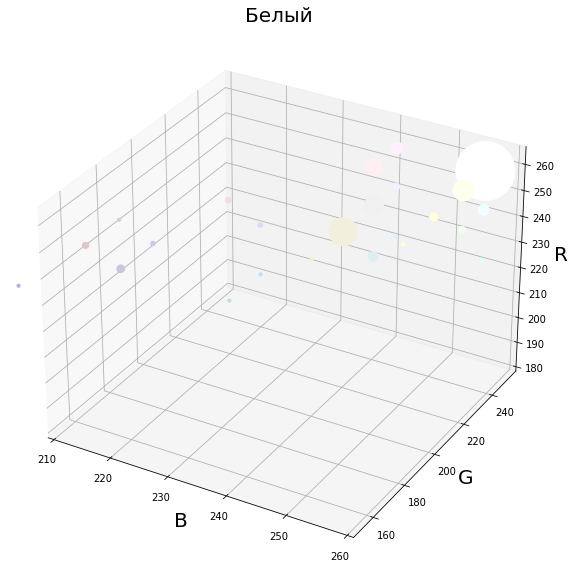

In [29]:
draw(0, x_min = 210, z_min = 180, z_max = 265, x_max = 260, y_min = 150)

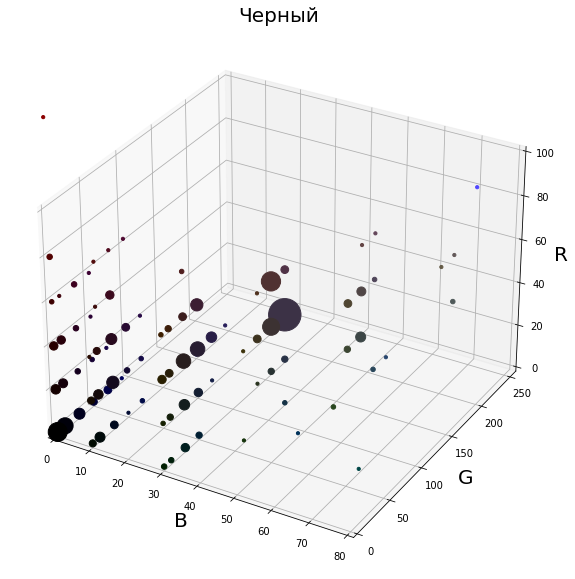

In [30]:
draw(1, x_max = 80, z_max = 100)

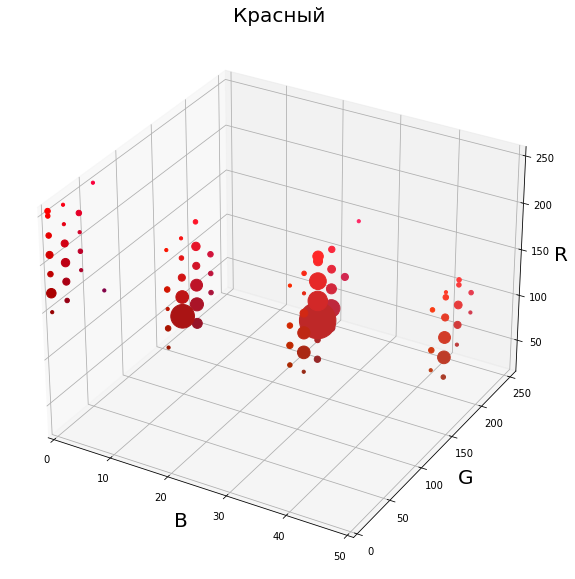

In [31]:
draw(2, x_max = 50, z_min = 20)

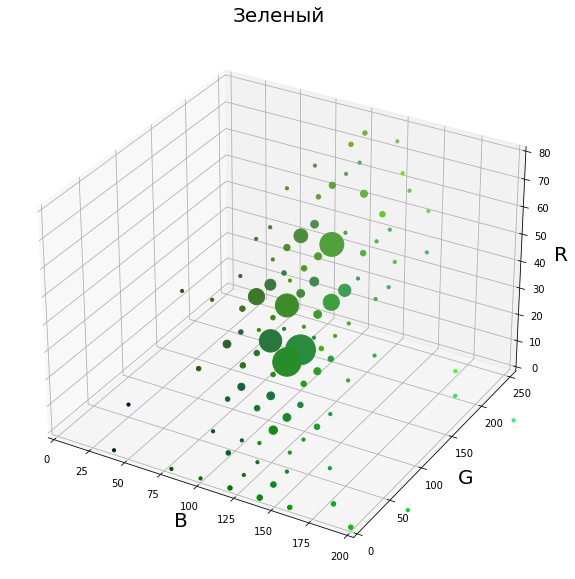

In [32]:
draw(3, z_max = 80, x_max = 200)

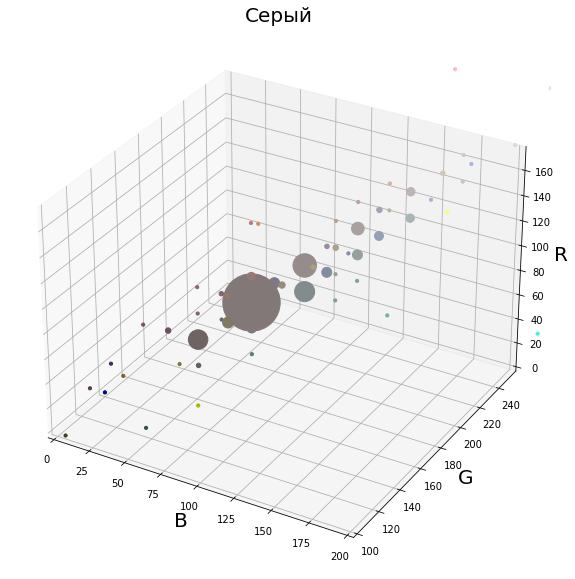

In [33]:
draw(4, y_min = 100, x_max = 200, z_max = 175)

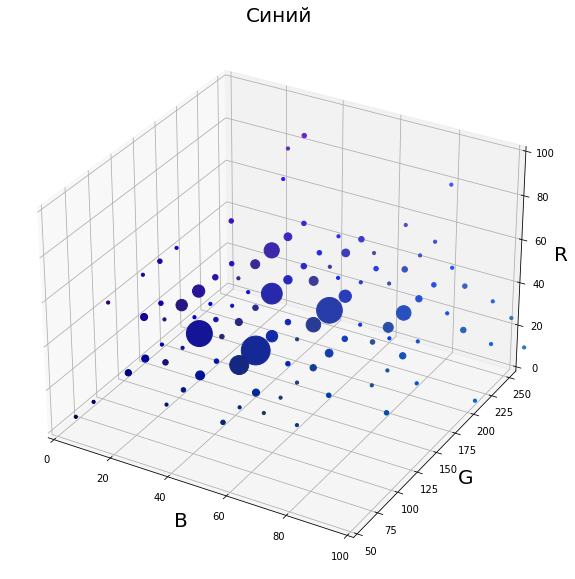

In [34]:
draw(5, x_max = 100, z_max = 100, y_min = 50)

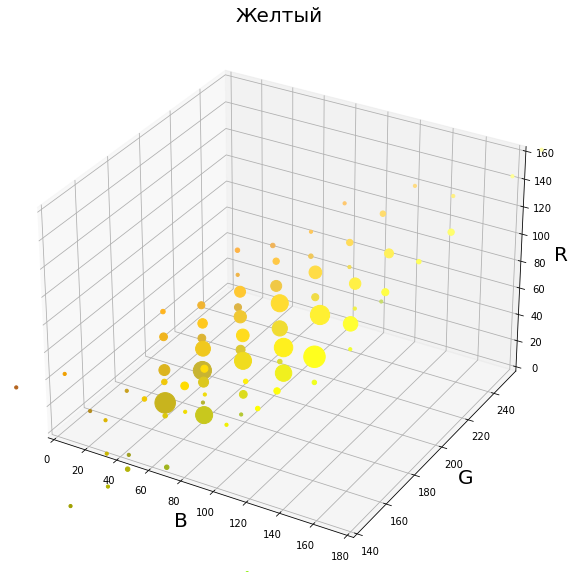

In [35]:
draw(6, y_min = 140, z_max = 160, x_max = 180, )

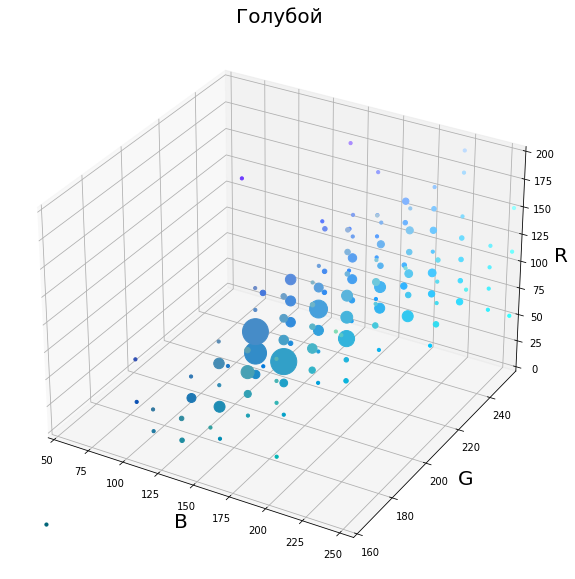

In [36]:
draw(7, z_max = 200, y_min = 160, x_min = 50)

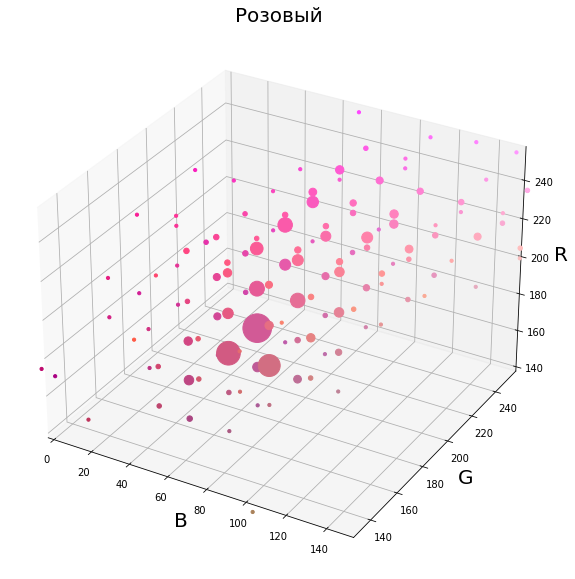

In [37]:
draw(8, z_min = 140, y_min = 130, x_max = 150)

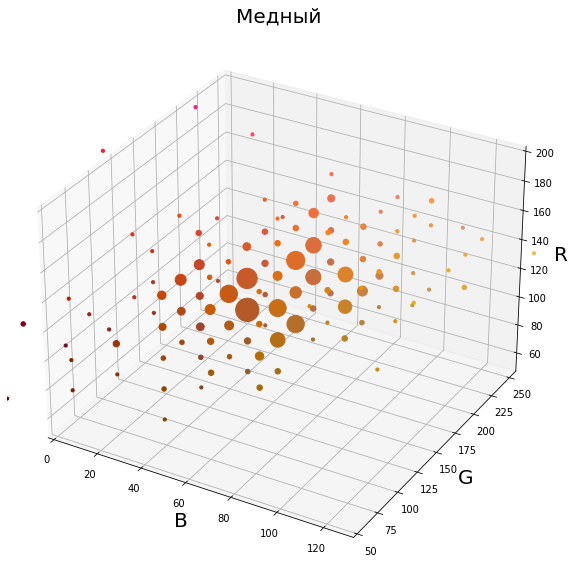

In [38]:
draw(9, z_max = 200, z_min = 50, x_max = 130, y_min = 50)

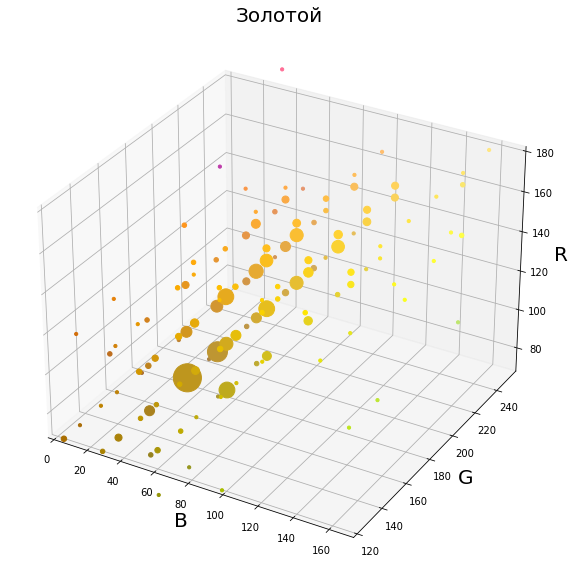

In [39]:
draw(10, z_min = 70, z_max = 180, y_min = 120, x_max = 170)

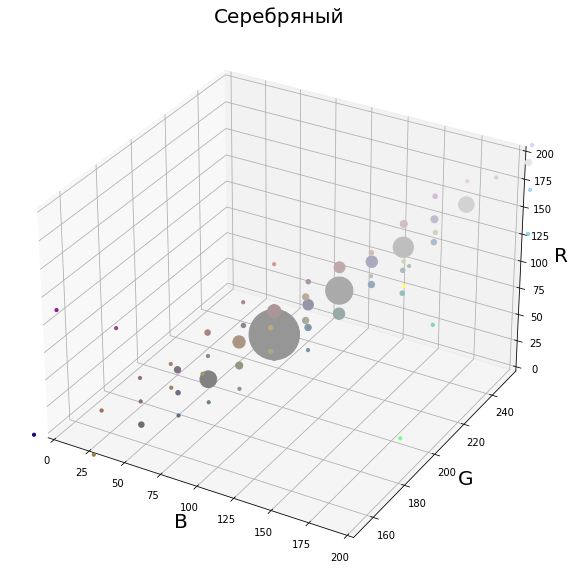

In [40]:
draw(11, y_min = 150, z_max = 200, x_max=200)

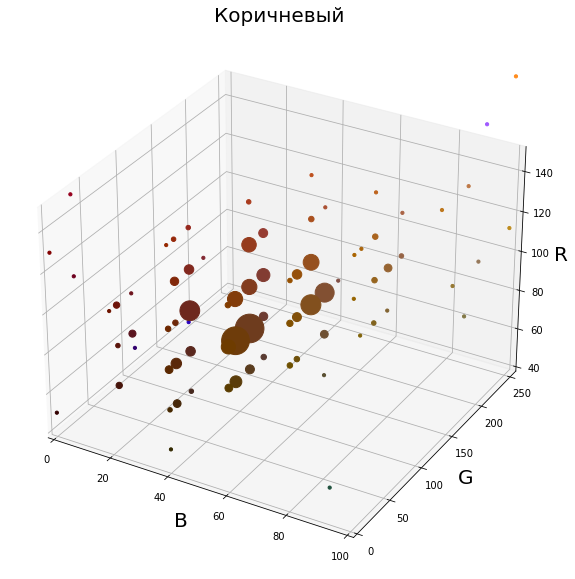

In [41]:
draw(12, z_max = 150, z_min = 40, x_max = 100)

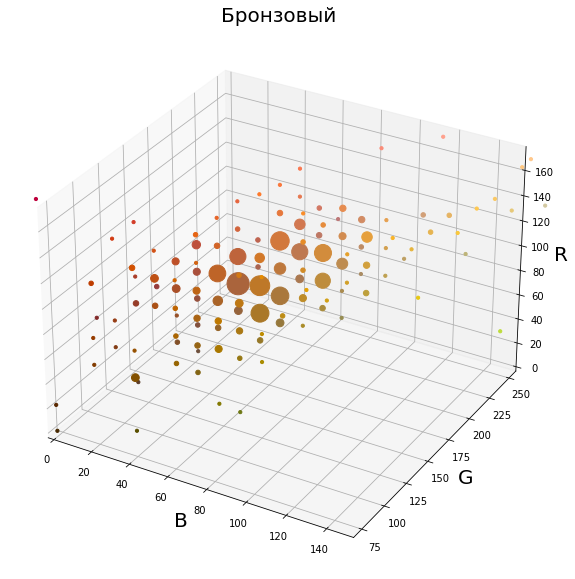

In [42]:
draw(13, z_max = 175, x_max = 150, y_min=70)

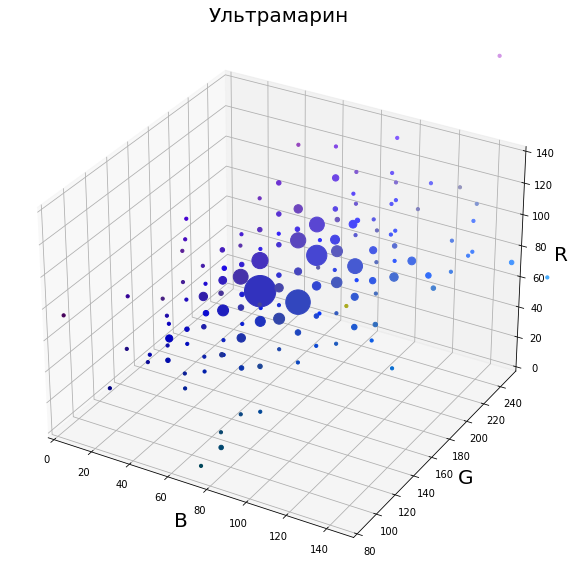

In [43]:
draw(14, z_max = 140, x_max = 150, y_min = 80)

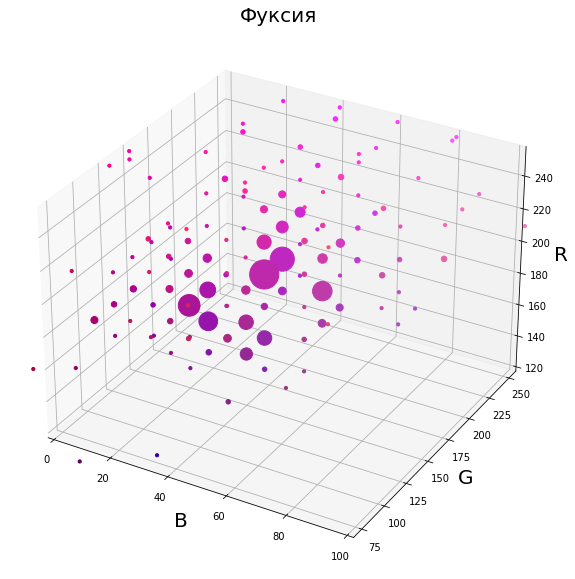

In [44]:
draw(15, z_min = 120, x_max = 100, y_min = 70)

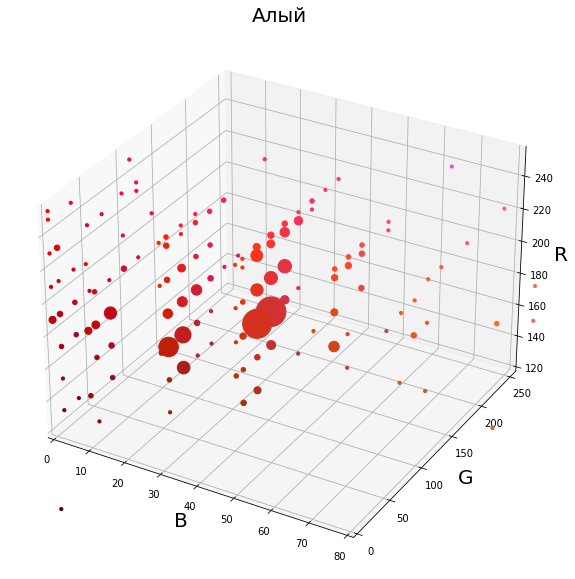

In [45]:
draw(16, z_min = 120, x_max = 80)

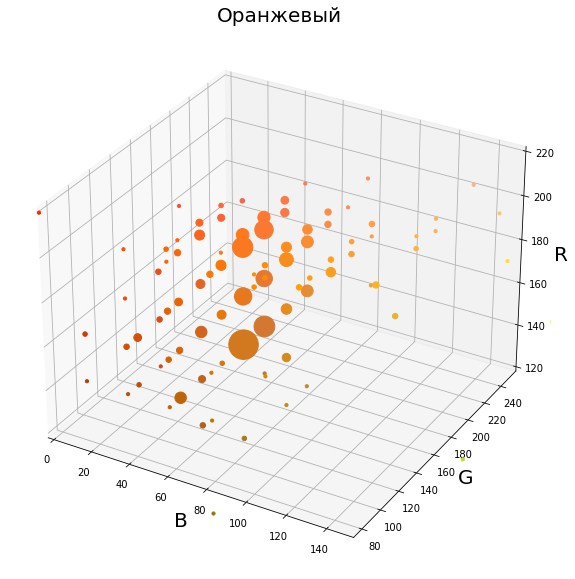

In [46]:
draw(17, z_min = 120, z_max = 220, y_min = 75, x_max = 150)

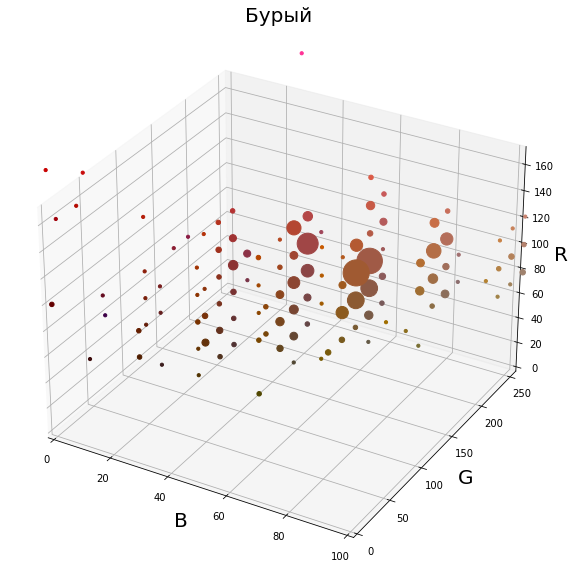

In [47]:
draw(18, z_max = 170, x_max = 100)

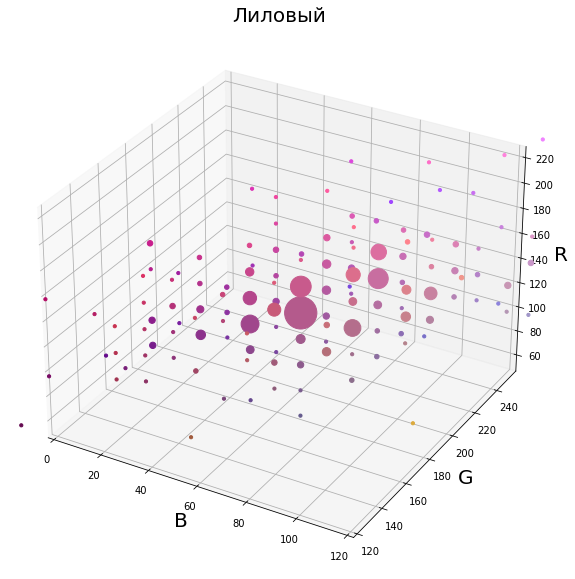

In [48]:
draw(19, z_min = 50, y_min = 120, x_max = 120, z_max = 225)

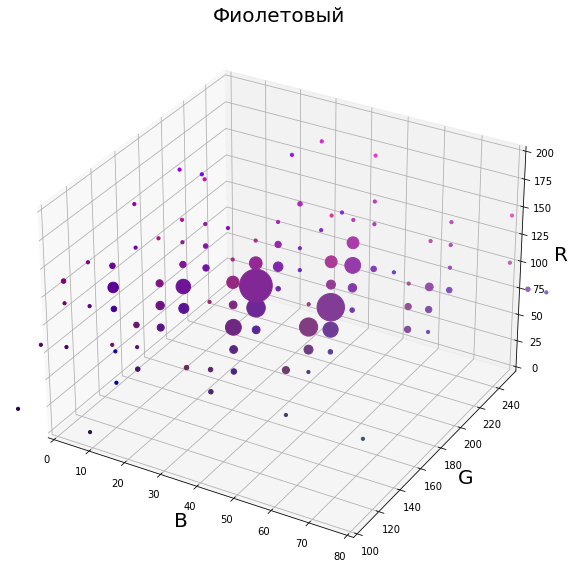

In [49]:
draw(20, z_max = 200, x_max = 80, y_min = 100)

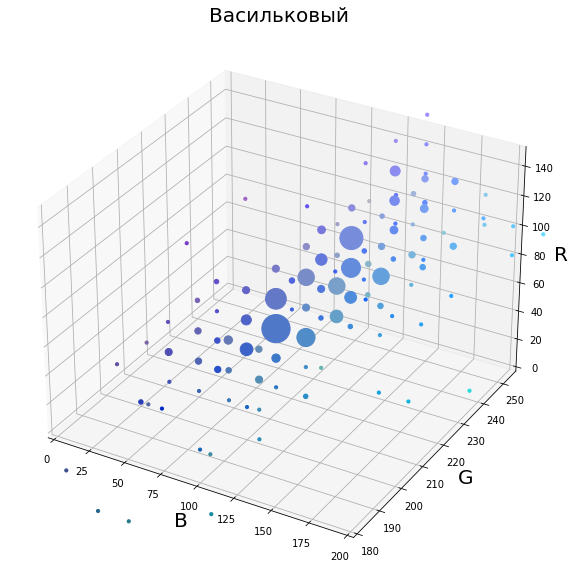

In [50]:
draw(21, z_max = 150, y_min = 180, x_max = 200)

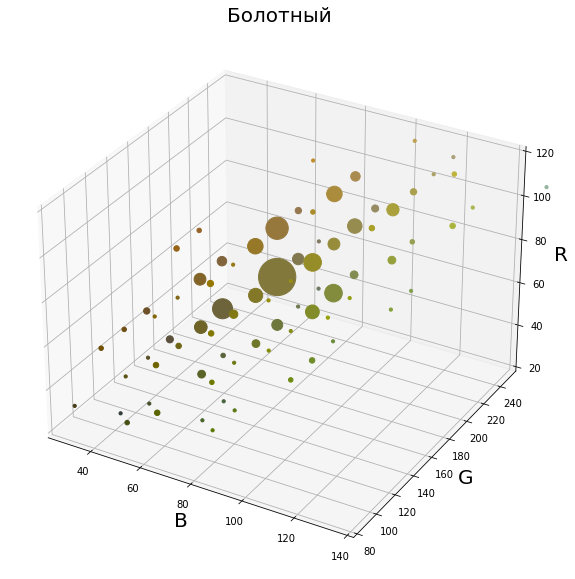

In [51]:
draw(22, z_max = 120, z_min = 20, x_max = 140, x_min = 25, y_min = 80)

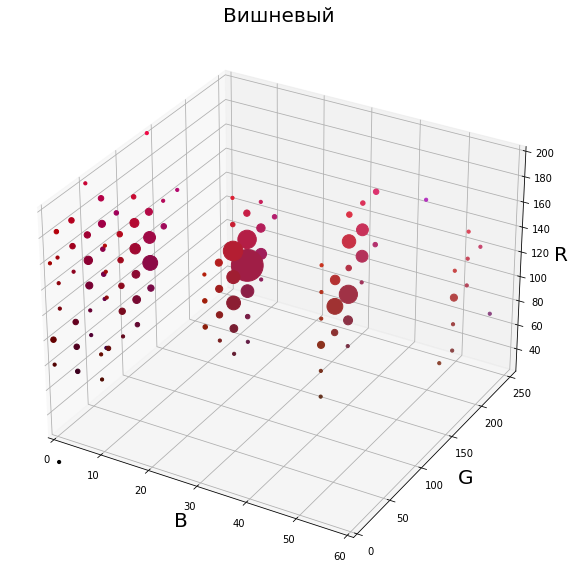

In [52]:
draw(23, x_max = 60, z_max = 200, z_min = 25)

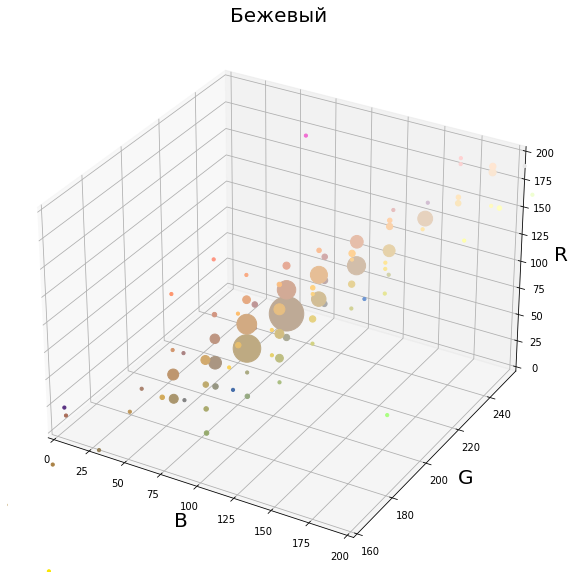

In [53]:
draw(24, y_min = 160, x_max = 200, z_max = 200)

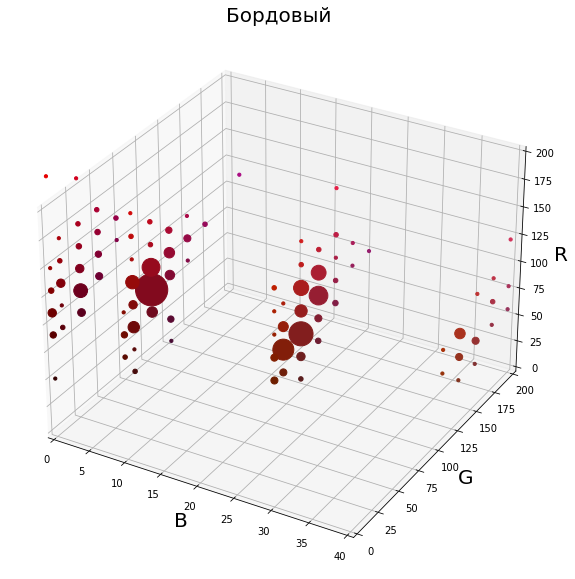

In [54]:
draw(25, z_max = 200, y_max = 200, x_max = 40)

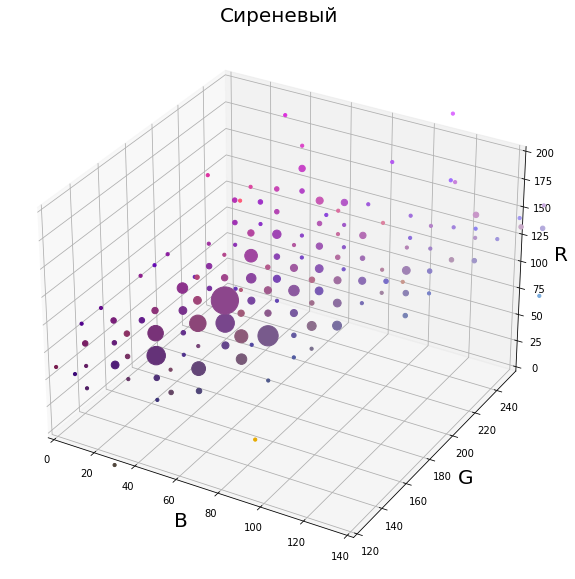

In [55]:
draw(26, x_max = 140, y_min = 120, z_max = 200)

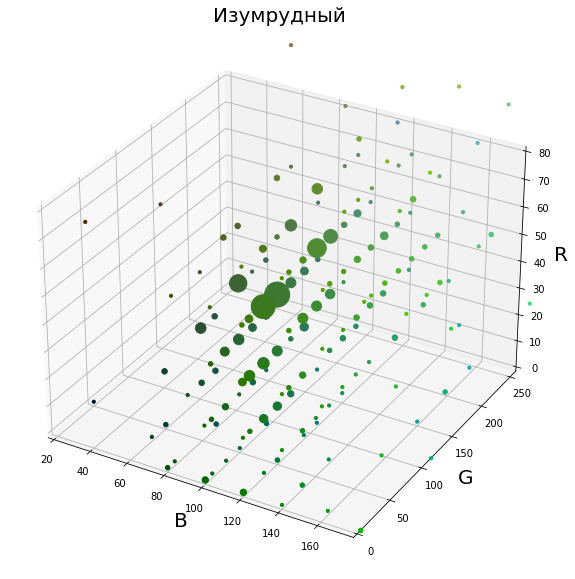

In [56]:
draw(27, z_max = 80, x_max = 175, x_min = 20)

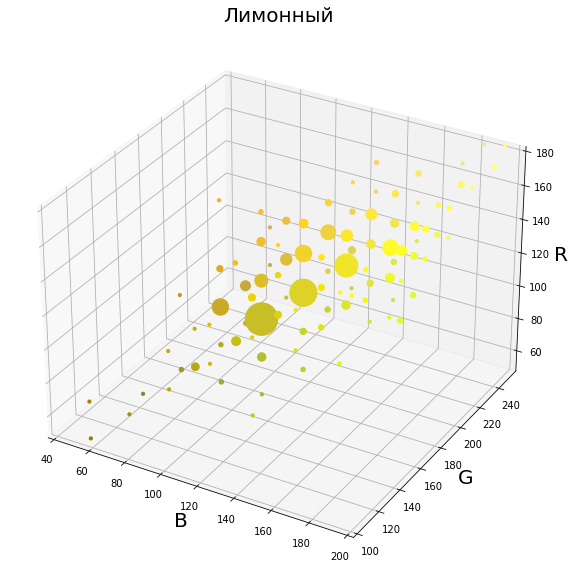

In [57]:
draw(28, z_max = 180, z_min = 50, y_min = 100, x_max = 200, x_min = 40)

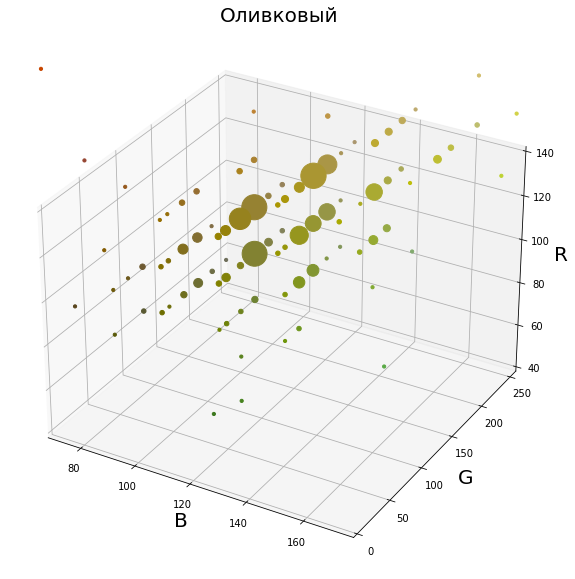

In [58]:
draw(29, z_max = 140, x_min = 70, x_max = 175, z_min = 40)

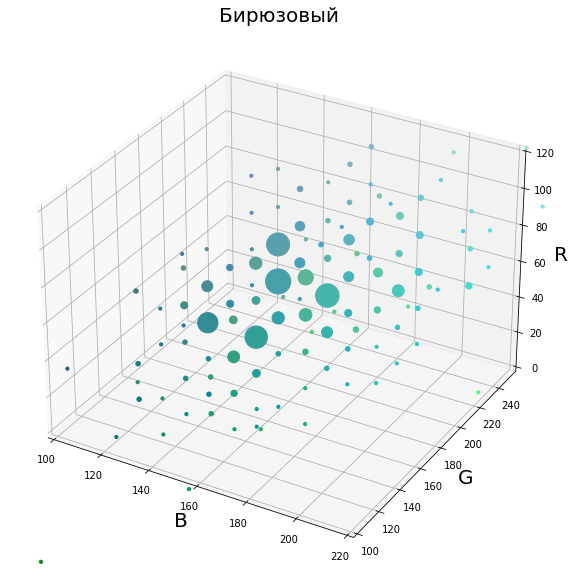

In [59]:
draw(30, x_min = 100, z_max = 120, x_max = 220, y_min = 100)

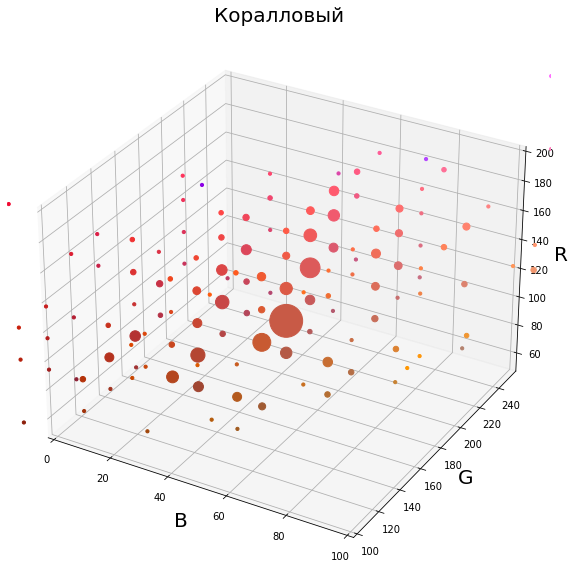

In [60]:
draw(31, z_min = 50, x_max = 100, y_min = 100, z_max = 200)